6장 학습 관련 기술들

In [1]:
class SGD:
    
    def __init__(self, lr=0.01):
        self.lr=lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

In [2]:
class Momentum:

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        
        if self.v is None:
            self.v = {}
            for key, val in params.items():                  
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key] 
            params[key] += self.v[key]

In [3]:
class AdaGrad:

    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

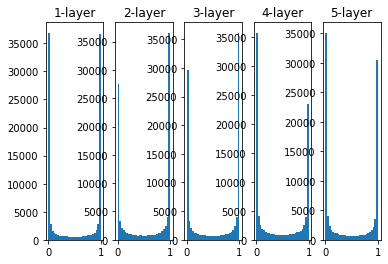

In [7]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100) 
node_num = 100  
hidden_layer_size = 5  
activations = {}  

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 1

    a = np.dot(x, w)

    z = sigmoid(a)
    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

In [6]:
w = np.random.rand(node_num, node_num) *0.01

In [8]:
import tensorflow as tf

train_data,test_data = tf.keras.datasets.mnist.load_data()
(x_train, t_train) = train_data
(x_test, t_test) = test_data

x_train = x_train.reshape(-1, 28**2)
x_test = x_test.reshape(-1, 28**2)

11493376/11490434 [==============================] - 0s 0us/step


In [9]:
x_train = x_train[:300]
t_train = t_train[:300]

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
pwd

'/content'

In [24]:
import sys
sys.path.append('/content/drive/MyDrive/Cola/')

In [25]:
import os
from common.multi_layer_net import MultiLayerNet

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

epoch:0, train acc:0.11333333333333333, test acc:0.098
epoch:1, train acc:0.07, test acc:0.0974
epoch:2, train acc:0.11333333333333333, test acc:0.098


/content/drive/MyDrive/Cola/common/multi_layer_net.py:92: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W ** 2)
/content/drive/MyDrive/Cola/common/multi_layer_net.py:92: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W ** 2)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/content/drive/MyDrive/Cola/common/functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)


epoch:3, train acc:0.11333333333333333, test acc:0.098
epoch:4, train acc:0.11333333333333333, test acc:0.098
epoch:5, train acc:0.11333333333333333, test acc:0.098
epoch:6, train acc:0.11333333333333333, test acc:0.098
epoch:7, train acc:0.11333333333333333, test acc:0.098
epoch:8, train acc:0.11333333333333333, test acc:0.098
epoch:9, train acc:0.11333333333333333, test acc:0.098
epoch:10, train acc:0.11333333333333333, test acc:0.098
epoch:11, train acc:0.11333333333333333, test acc:0.098
epoch:12, train acc:0.11333333333333333, test acc:0.098
epoch:13, train acc:0.11333333333333333, test acc:0.098
epoch:14, train acc:0.11333333333333333, test acc:0.098
epoch:15, train acc:0.11333333333333333, test acc:0.098
epoch:16, train acc:0.11333333333333333, test acc:0.098
epoch:17, train acc:0.11333333333333333, test acc:0.098
epoch:18, train acc:0.11333333333333333, test acc:0.098
epoch:19, train acc:0.11333333333333333, test acc:0.098
epoch:20, train acc:0.11333333333333333, test acc:0.098